In [31]:
%matplotlib inline
from __future__ import print_function

import os;
import codecs;
import re;
import json;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

import seaborn as sn;
import html;

ImportError: No module named html

In [2]:
from os.path import expanduser
home = expanduser("~")

In [17]:
lyrics = None;

with codecs.open(home+r'/songs.json', mode='r') as outfile:
    lyrics = json.load(outfile);

In [18]:
for l in lyrics:
    if l['contributor']:
        l['contributor'] = l['contributor'].strip()
    if l['exbibitions']:
        l['exbibitions'] = l['exbibitions'][0];
        l['exbibitions'] = float(re.sub(r'\D','', l['exbibitions']))
    if len(l['genre']) < 2:
        l['genre'] = 'unknown';

In [32]:
print (html.unscape)

NameError: name 'html' is not defined

In [20]:
df = pd.DataFrame(lyrics);

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53486 entries, 0 to 53485
Data columns (total 7 columns):
artist         53486 non-null object
compositor     53486 non-null object
contributor    53486 non-null object
exbibitions    53486 non-null object
genre          53486 non-null object
songHtml       53486 non-null object
title          53486 non-null object
dtypes: object(7)
memory usage: 2.9+ MB


In [22]:
df.head()

,artist,compositor,contributor,exbibitions,genre,songHtml,title
0,1Kilo,,/membros/7957031/,"40,026.00",Hip Hop/Rap,<article> <p>[Chino]\nA menina doce me olha\nS...,O Surto
1,1Kilo,DoisP / Knust / Pablo Martins / Rafael Sadan ·,/membros/7871371/,"49,954.00",Hip Hop/Rap,<article> <p>[Pablo]\nAten&#231;&#227;o de sol...,Reza Sincera
2,1Kilo,Pablo Martins / Pelé MilFlows ·,/membros/4187525/,"4,276.00",Hip Hop/Rap,<article> <p>[Pablo]\nEnquanto as nuvens me gu...,Porta do Céu
3,1Kilo,DoisP / MZ / Pablo Martins ·,/membros/4187525/,"4,351.00",Hip Hop/Rap,<article> <p>[Pablo]\nAs luzes da boate reflet...,Amor e Vingança
4,1Kilo,,/membros/7010597/,"3,897.00",Hip Hop/Rap,<article> <p>Lindaaaa\nBela princesa\nQuando m...,Linda (part. Nosense)


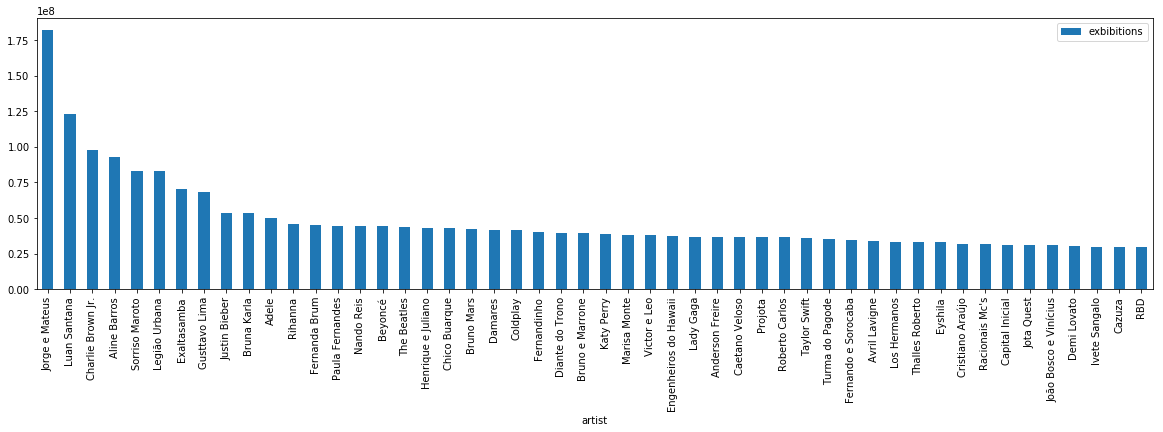

In [26]:
plt.figure(figsize=(20,10))
df[['artist','exbibitions']] \
    .groupby(by=['artist'])\
    .sum()\
    .reset_index()\
    .sort_values(by='exbibitions',ascending=False)\
    .head(50)\
    .plot.bar(x='artist',y='exbibitions', figsize=(20,5))

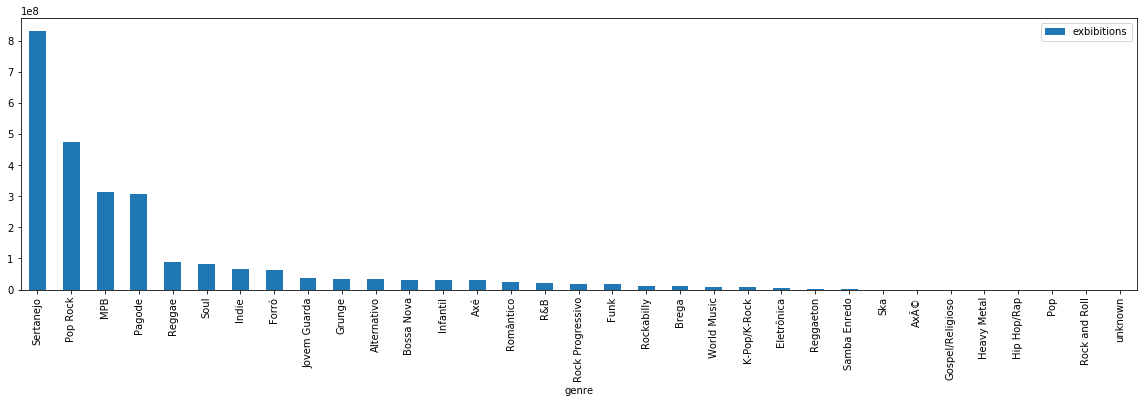

In [27]:
plt.figure(figsize=(10,2))
df[['genre','exbibitions']] \
    .groupby(by=['genre'])\
    .sum()\
    .reset_index()\
    .sort_values(by='exbibitions',ascending=False)\
    .head(40)\
    .plot.bar(x='genre',y='exbibitions', figsize=(20,5));
plt.plot();

In [28]:
pd.options.display.float_format = '{:,.2f}'.format
(df[df.genre != 'Gospel/Religioso'])[['artist','exbibitions']] \
    .groupby(by=['artist'])\
    .sum()\
    .reset_index()\
    .sort_values(by='exbibitions',ascending=False)\
    .head(40)

,artist,exbibitions
94,Jorge e Mateus,"181,652,922.00"
114,Luan Santana,"122,791,430.00"
38,Charlie Brown Jr.,"97,939,591.00"
194,Sorriso Maroto,"83,185,211.00"
107,Legião Urbana,"83,047,740.00"
64,Exaltasamba,"70,217,318.00"
79,Gusttavo Lima,"68,426,160.00"
98,Justin Bieber,"53,368,164.00"
2,Adele,"50,100,302.00"
181,Rihanna,"45,494,412.00"
